# Imports

In [1]:
from sklearnex import patch_sklearn # Otimizar sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [11]:
# Redução de dimensionalidade
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

import pandas as pd
import matplotlib.pyplot as plt

# Scatter

In [3]:
colors = {
	'Entertainment': 'red',
	'Independence': 'orange',
	'Machine Learning': 'green',
	'News': 'blue',
	'Science': 'purple',
	'Software Development': 'brown',
	'Sprituality': 'gray',
	'Wellness': 'cyan'
}

In [40]:
reducao_dimensionalidade = {
	'TSNE': lambda x: TSNE(n_components=2, init='random', verbose=1).fit_transform(x),
	'PCA': lambda x: PCA(n_components=2).fit_transform(x)
}

In [41]:
dados_reducao_dimensionalidade = {
	'TFIDF': {
		'PCA': {},
		'TSNE': {}
	},
	'BOW': {
		'PCA': {},
		'TSNE': {}
	},
}

## Carregar dados de representações

In [44]:
representacoes_vetoriais = ['TFIDF', 'BOW']
for dimension_reduction in ['TSNE', 'PCA']:
	for representation in representacoes_vetoriais:
		print(f'{representation=} {dimension_reduction=}')
		for topic in colors:
			data = pd.read_feather(f'./smote/{representation}/{topic}.feather').drop(columns=['Topic'])
			if not dados_reducao_dimensionalidade[representation][dimension_reduction].get(topic):
				dados_reducao_dimensionalidade[representation][dimension_reduction][topic] = reducao_dimensionalidade[dimension_reduction](data)

representation='TFIDF' dimension_reduction='TSNE'
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 678 samples in 0.503s...
[t-SNE] Computed neighbors for 678 samples in 0.826s...
[t-SNE] Computed conditional probabilities for sample 678 / 678
[t-SNE] Mean sigma: 0.280967
[t-SNE] KL divergence after 250 iterations with early exaggeration: 98.891975
[t-SNE] KL divergence after 1000 iterations: 1.626848
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 678 samples in 0.431s...
[t-SNE] Computed neighbors for 678 samples in 0.884s...
[t-SNE] Computed conditional probabilities for sample 678 / 678
[t-SNE] Mean sigma: 0.383223
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.381119
[t-SNE] KL divergence after 1000 iterations: 0.906741
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 678 samples in 0.438s...
[t-SNE] Computed neighbors for 678 samples in 0.726s...
[t-SNE] Computed conditional probabilities for sample 678 / 678
[t-SNE] Mean sigma:

## Desenhar scatter com todos os dados juntos

In [57]:
representation = 'TFIDF'
# representation = 'BOW'

reduction = 'TSNE'
# reduction = 'PCA'

# xlim, ylim = (-70, 70), (-70, 70)
xlim, ylim = None, None


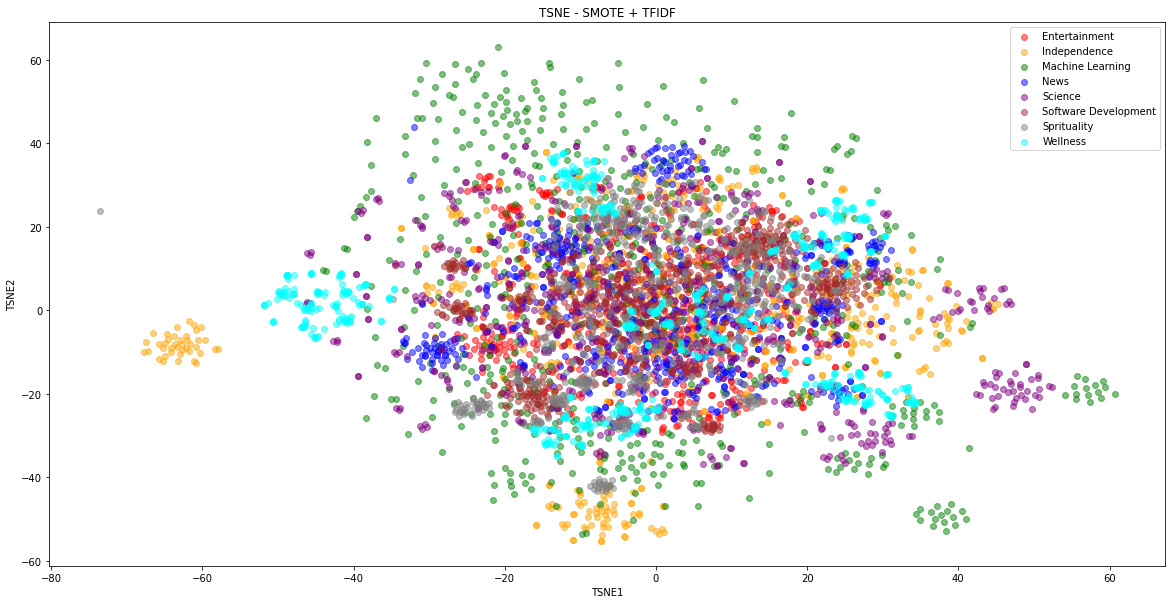

In [58]:
plt.figure(figsize=(20, 10))

for topic in colors:
	data = pd.read_feather(f'./smote/{representation}/{topic}.feather').drop(columns=['Topic'])

	plt.scatter(
		[y[0] for y in dados_reducao_dimensionalidade[representation][reduction][topic]],
		[y[1] for y in dados_reducao_dimensionalidade[representation][reduction][topic]],
		color=colors[topic],
		alpha=0.5,
		label=topic
	)

plt.title(f'{reduction} - SMOTE + {representation}')
plt.xlabel(f'{reduction}1')
plt.ylabel(f'{reduction}2')

if all([xlim, ylim]):
	plt.xlim(xlim)
	plt.ylim(ylim)

plt.legend()
plt.savefig(f'img/{representation}/{reduction}/{reduction.lower()}-smote-{representation.lower()}-all.png')

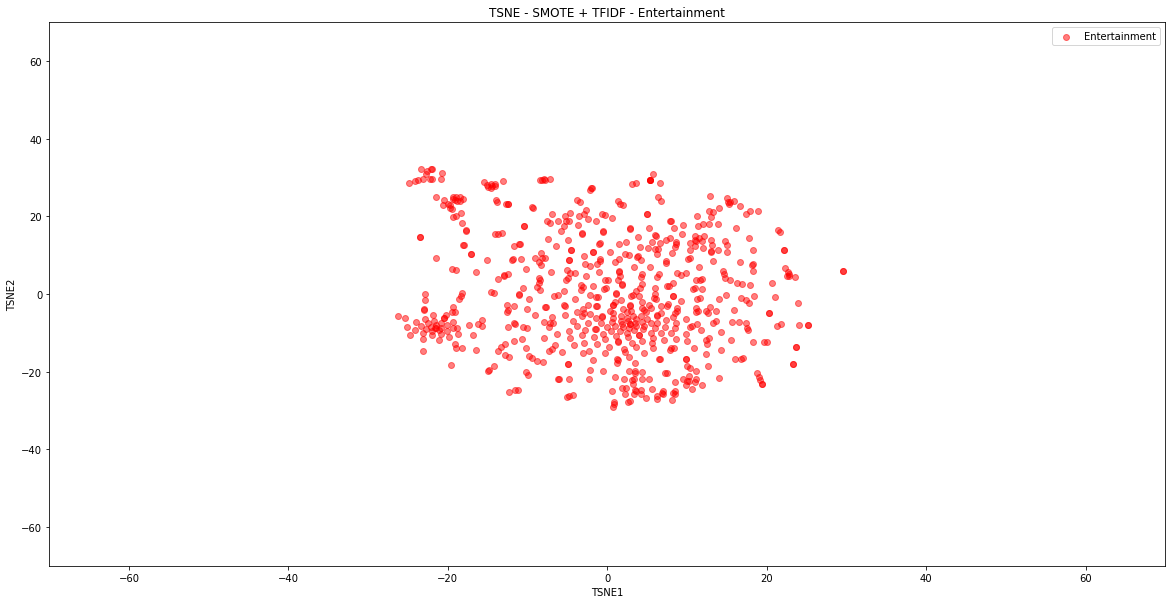

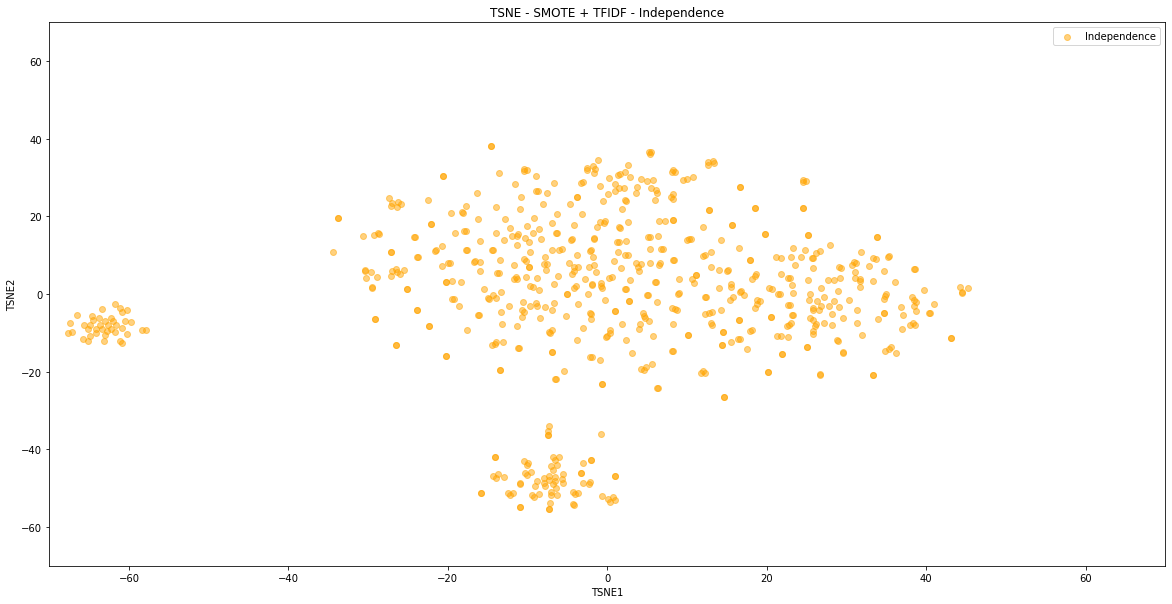

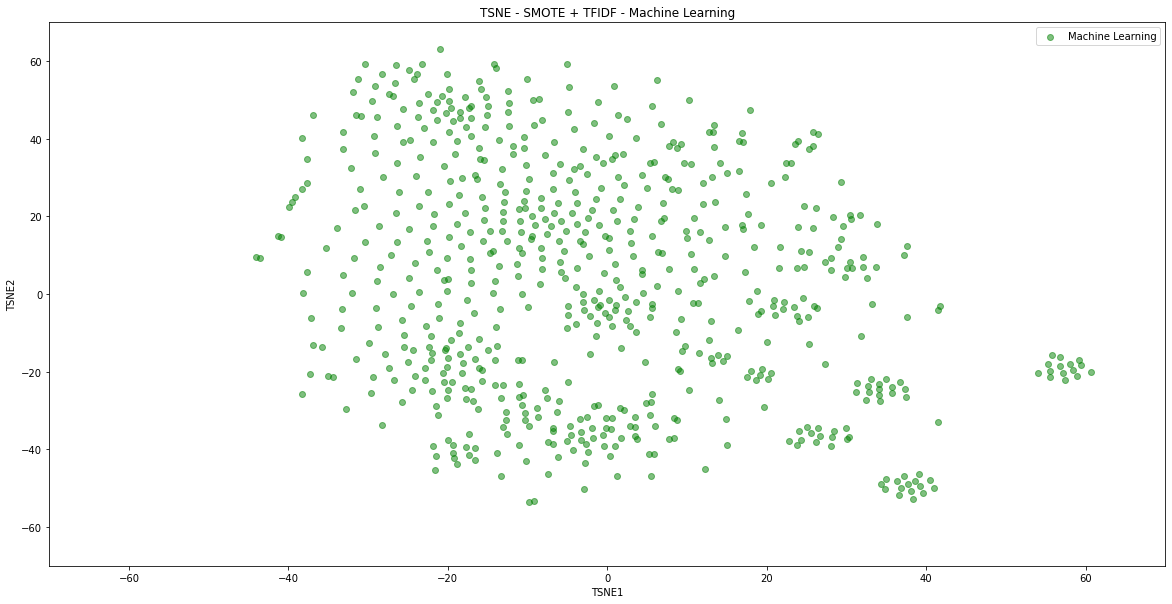

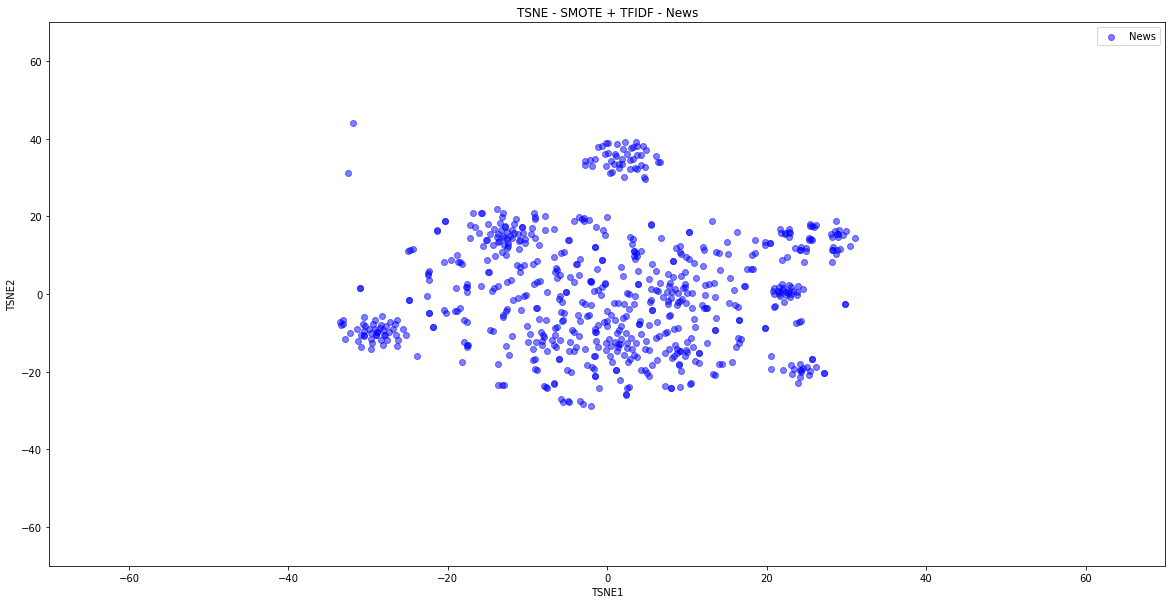

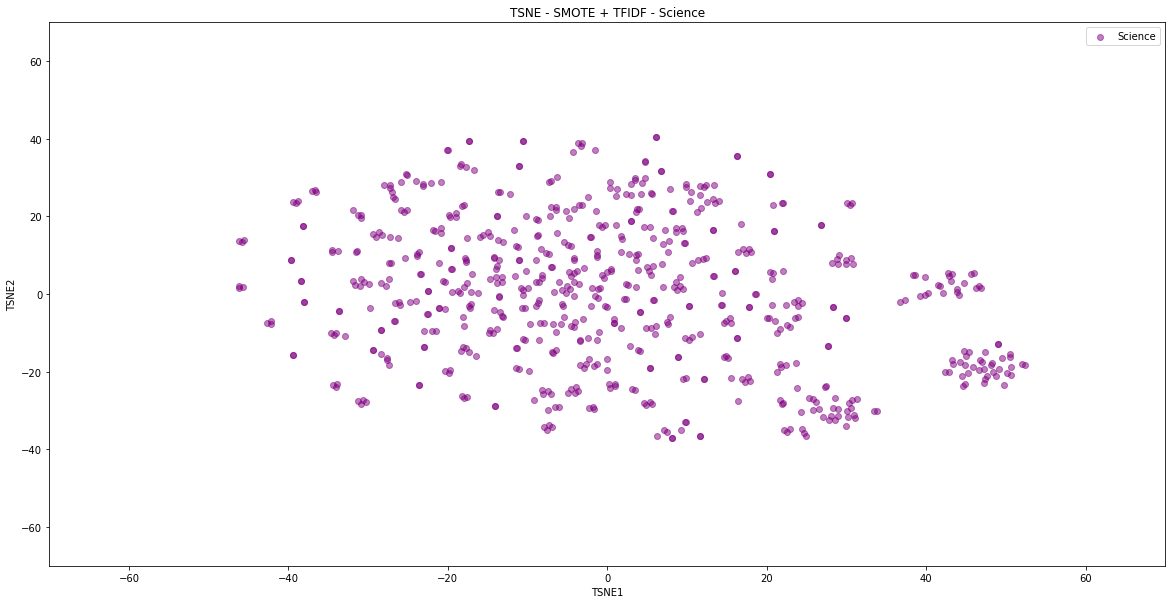

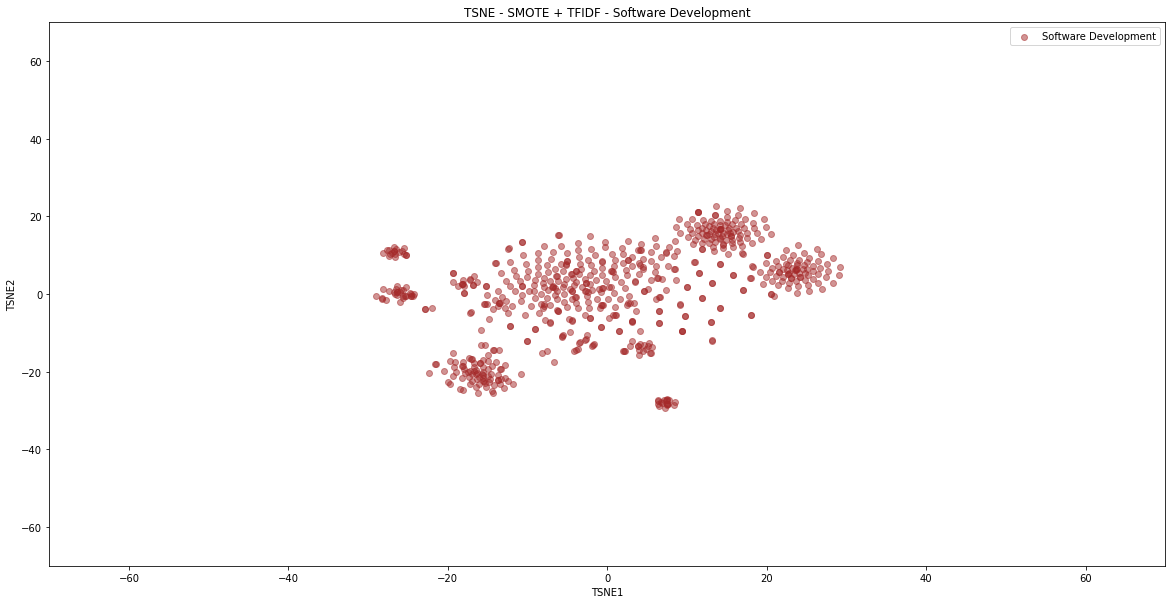

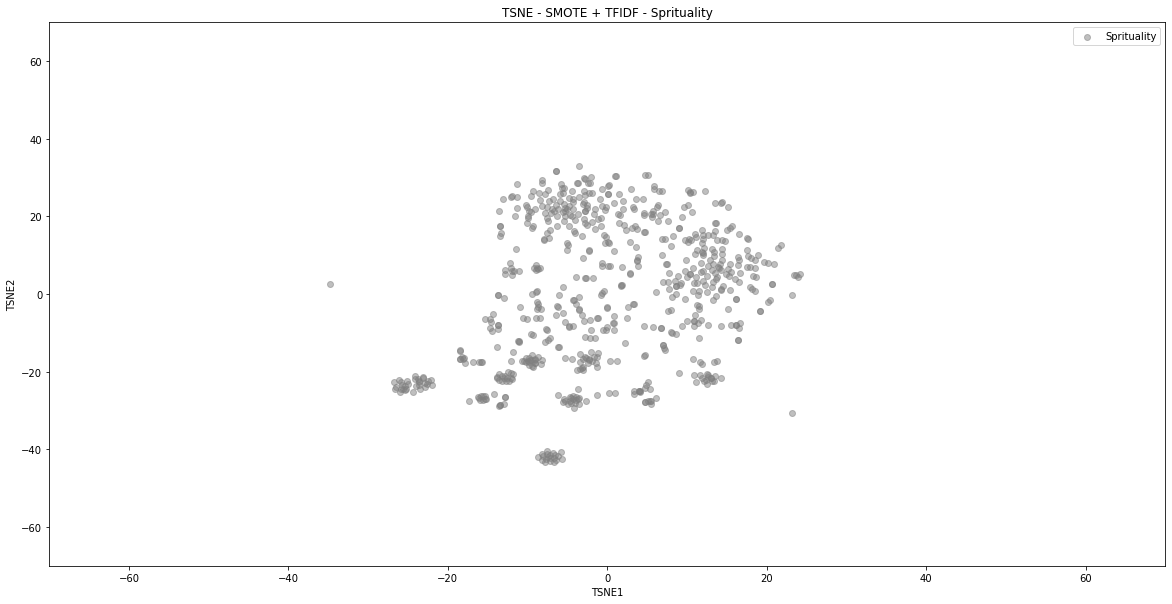

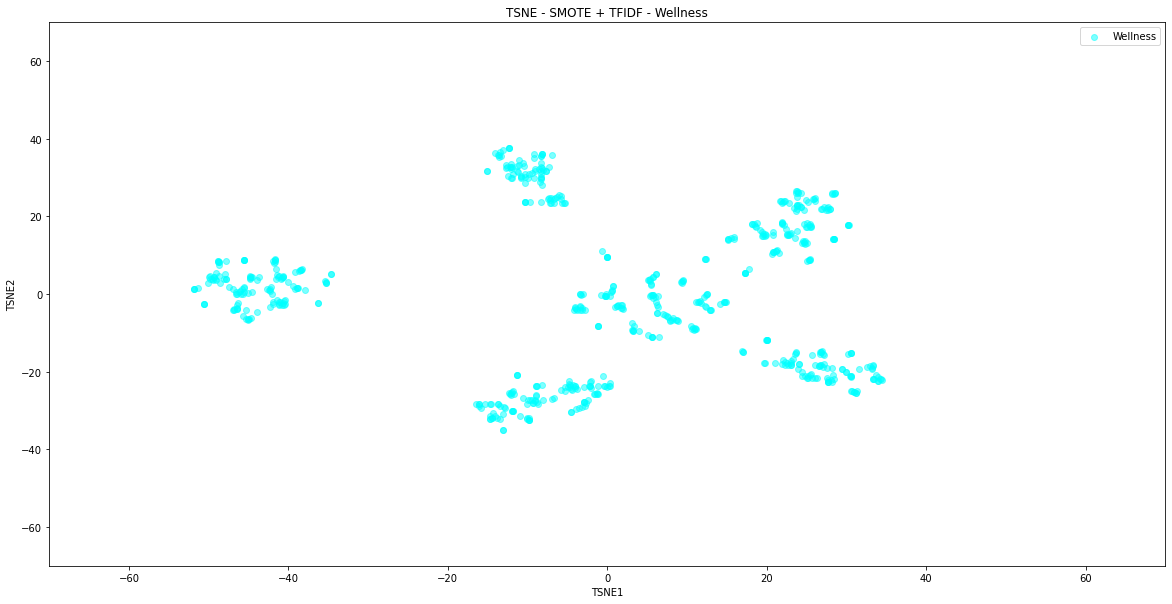

In [59]:
for topic in colors:
	data = pd.read_feather(f'./smote/{representation}/{topic}.feather').drop(columns=['Topic'])

	plt.figure(figsize=(20, 10))

	plt.scatter(
		[y[0] for y in dados_reducao_dimensionalidade[representation][reduction][topic]],
		[y[1] for y in dados_reducao_dimensionalidade[representation][reduction][topic]],
		color=colors[topic],
		alpha=0.5,
		label=topic
	)

	plt.title(f'{reduction} - SMOTE + {representation} - {topic}')
	plt.xlabel(f'{reduction}1')
	plt.ylabel(f'{reduction}2')

	if all([xlim, ylim])
	plt.xlim(xlim)
	plt.ylim(ylim)

	plt.legend()
	plt.savefig(f'img/{representation}/{reduction}/{reduction.lower()}-smote-{representation.lower()}-{topic.replace(" ", "_").lower()}.png')